In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\user\AppData\Local\Temp\ipykernel_8264\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("titanic.csv")
ori = df

In [4]:
#visualization of the dataset
print(df.shape)
print('-'*40)
print(df.info())
print('-'*40)
print(df.describe())
print('-'*40)
print(df.describe(include=['O']))
print('-'*40)
print(df.head(10))

(891, 12)
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------------------------------
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean   

In [5]:
#check duplicate rows in data ( data cleaning for duplicated data)
duplicated_rows =df[df.duplicated()]
print("Number of duplicated rows::",duplicated_rows.shape)

#Removing the duplicated row
df = df.drop_duplicates()
duplicate_rows =df[df.duplicated()]
print("Number of duplicate rows ::",duplicate_rows.shape)

Number of duplicated rows:: (0, 12)
Number of duplicate rows :: (0, 12)


In [6]:
# missing values detection and imputation
#looking for null values
print("Null values ::")
print(df.isnull().sum())

#check if the other data is consistent
df.shape

Null values ::
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


(891, 12)

In [7]:
(df.isnull().sum().sort_values(ascending= False)*100) /df.shape[0]

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [9]:
df.drop(['Cabin','Ticket','Name'],axis= 1, inplace =True)
# deleting of unneeded columns

In [10]:
# Imputing missing values for Age variable with the median from the same DataFrame 'df'
df['Age'] = df['Age'].fillna(df['Age'].median())

#Inputting missing values for Age variable with the mean


In [11]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
#Imputing missing values for Embarked variable with the most frequent

In [12]:
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int) 
df['Embarked'] = df['Embarked'].map( {'Q': 0, 'C': 1,'S':2} ).astype(int) 
df.head()
## transforming the qualitatives variables into quantitative 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2


In [13]:
#finding IQR  and Z Score
#Find the InterQuartile Range 
# Find the InterQuartile Range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print('*********** InterQuartile Range ***********')
print(IQR)

# Remove the outliers using IQR
df2 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the shape of the DataFrame after removing outliers
print(df2.shape)


*********** InterQuartile Range ***********
PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Sex              1.0000
Age             13.0000
SibSp            1.0000
Parch            0.0000
Fare            23.0896
Embarked         1.0000
dtype: float64
(577, 9)


In [14]:
#Z-score
#Removing outliers using Z-score 
from scipy import stats
z = np.abs(stats.zscore(df)) 
df3 = df[(z<3).all(axis=1)] 
df3.shape 

(820, 9)

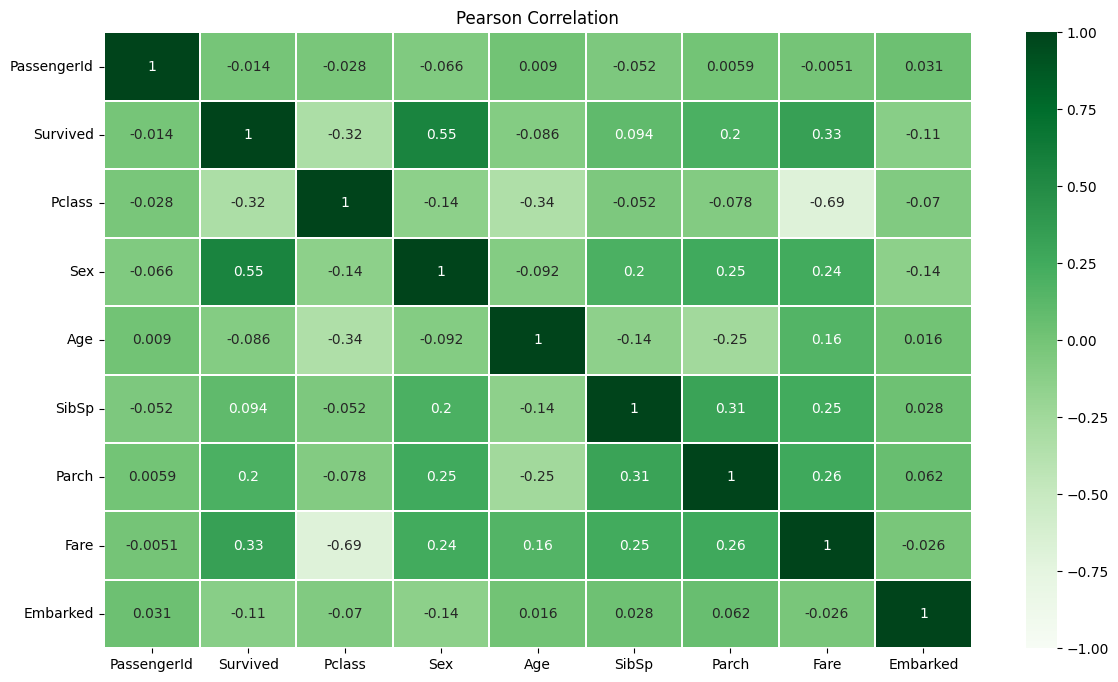

In [26]:
# Calculate Pearson and Spearman correlations ifdf3
import matplotlib.pyplot as plt
import seaborn as sns
pearsonCorr = df3.corr(method='pearson')
spearmanCorr = df3.corr(method='spearman')

# Create a heatmap for Pearson correlation
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(pearsonCorr, vmin=-1, vmax=1, cmap="Greens", annot=True, linewidths=0.1)
plt.title("Pearson Correlation")
plt.show()

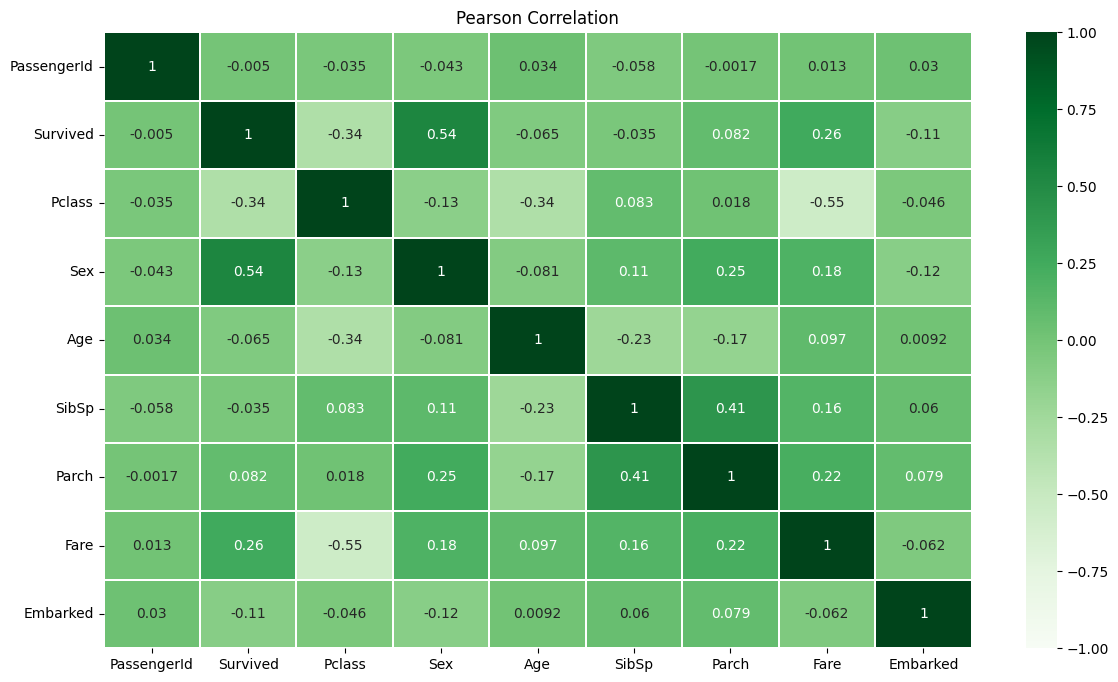

In [27]:
# Calculate Pearson and Spearman correlations ifdf
import matplotlib.pyplot as plt
import seaborn as sns
pearsonCorr = df.corr(method='pearson')
spearmanCorr = df.corr(method='spearman')

# Create a heatmap for Pearson correlation
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(pearsonCorr, vmin=-1, vmax=1, cmap="Greens", annot=True, linewidths=0.1)
plt.title("Pearson Correlation")
plt.show()

Text(0.5, 1.0, 'Pearson Correlation')

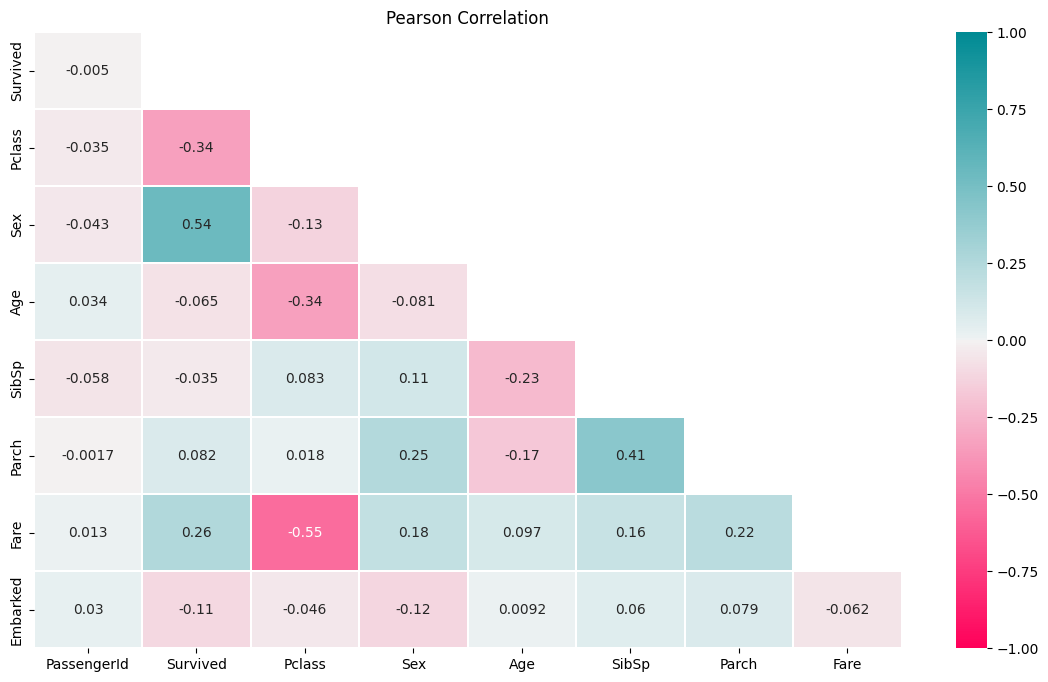

In [28]:
#Create mask for both correlation matrices 
#Pearson corr masking 
#Generating mask for upper triangle 
maskP = np.triu(np.ones_like(pearsonCorr,dtype=bool)) 
#Adjust mask and correlation 
maskP = maskP[1:,:-1] 
pCorr = pearsonCorr.iloc[1:,:-1].copy() 
#Setting up a diverging palette 
cmap = sns.diverging_palette(0, 200, 150, 50, as_cmap=True) 
fig = plt.subplots(figsize=(14,8)) 
sns.heatmap(pCorr, vmin=-1,vmax=1, cmap = cmap, annot=True, linewidth=0.3, mask=maskP) 

plt.title("Pearson Correlation")

In [33]:
#Preparing data for training and test
#Define feature vector and target variable (class) 
X = df3.drop(['Survived'], axis=1) 
y = df3['Survived'] 

#Split data into separate training and test set 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state = 42) 

#Check the shape of X_train and X_test 
print("\n") 
print("train and test sample size", X_train.shape, X_test.shape) 
from sklearn.neighbors import KNeighborsClassifier 
k_values = [i for i in range (10,31)] 
scores = [] 
error_rate = [] 
for k in k_values: 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test) 
    scores.append(knn.score(X_test, y_test)) 
    error_rate.append(np.mean(y_pred!=y_test))
    sns.lineplot(x = k_values, y = scores, marker = 'o')

plt.xlabel("K Values") 
plt.ylabel("Accuracy Score") 
plt.show() 
sns.lineplot(x = k_values, y = error_rate, marker = 'o') 
plt.xlabel("K Values") 
plt.ylabel("Error rate") 
plt.show() 
#Get the best k and train kNN 
#best_index = np.argmax(scores) 
#best_k = k_values[best_index] 
#knn = KNeighborsClassifier(n_neighbors=best_k) 
#knn.fit(X_train, y_train) 
#y_pred = knn.predict(X_test) 
#print("\nk = ", best_k) 
#print("\nkNN Evaluation:\n") 
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred)) 
#print("\nkNN confusion matrix:\n") 
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred) 
#print(cm) 




train and test sample size (549, 8) (271, 8)


ValueError: All arrays must be of the same length